In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from pandas.core.dtypes.common import classes
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/finaldataset', output="char_output_extended", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 5518 files [00:09, 570.14 files/s]


In [6]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras

from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
get_ipython().run_line_magic('matplotlib', 'inline')

In [7]:
from tensorflow.keras.optimizers import SGD,Adam
import tensorflow as tf 
import keras
import numpy as np
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from six.moves import cPickle as Pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [8]:
IMG_WIDTH=64
IMG_HEIGHT=64
img_folder=r'/content/char_output_extended/train'

In [9]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/content/char_output_extended/train')

In [10]:
IMG_WIDTH=64
IMG_HEIGHT=64
img_folder=r'/content/char_output_extended/test'

In [11]:
def create_dataset(img_folder):
   
    img_data_test_array=[]
    class_name_test=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_test_array.append(image)
            class_name_test.append(dir1)
    return img_data_test_array, class_name_test
# extract the image array and class name
img_test_data, class_name_test =create_dataset(r'/content/char_output_extended/test')

In [12]:
target_dict_test={k: v for v, k in enumerate(np.unique(class_name_test))}
target_dict_test

{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [13]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict


{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [14]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [15]:
target_test_val=  [target_dict_test[class_name_test[i]] for i in range(len(class_name_test))]

In [16]:
IMG_WIDTH=64
IMG_HEIGHT=64
img_folder=r'/content/char_output_extended/val'

In [17]:
def create_dataset(img_folder):
   
    img_data_vali_array=[]
    class_name_vali=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_vali_array.append(image)
            class_name_vali.append(dir1)
    return img_data_vali_array, class_name_vali
# extract the image array and class name
img_vali_data, class_name_vali =create_dataset(r'/content/char_output_extended/val')

In [18]:
target_dict_vali={k: v for v, k in enumerate(np.unique(class_name_vali))}
target_dict_vali

{'Aa': 0,
 'Aaaa': 1,
 'aaha': 2,
 'am': 3,
 'anna': 4,
 'bha': 5,
 'cha': 6,
 'dha': 7,
 'dhaa': 8,
 'ee': 9,
 'ga': 10,
 'ha': 11,
 'ja': 12,
 'ka': 13,
 'la': 14,
 'ma': 15,
 'na': 16,
 'pa': 17,
 'ra': 18,
 'sya': 19,
 'tha': 20,
 'va': 21,
 'ya': 22,
 'yaotthu': 23,
 'ye': 24}

In [19]:
target_vali_val=  [target_dict_vali[class_name_vali[i]] for i in range(len(class_name_vali))]

In [20]:

vali_data=np.array(img_vali_data, np.float32)
vali_labels=np.array(list(map(int,target_vali_val)), np.float32)
vali_labels=to_categorical(vali_labels)
print(vali_labels.shape)
print(vali_data.shape)

(539, 25)
(539, 64, 64)


In [21]:
import numpy as np

vali_data = np.expand_dims(vali_data[..., 0], axis=-1)
print(vali_labels.shape)
print(vali_data.shape)

(539, 25)
(539, 64, 1)


In [26]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (64, 64)  # Modified image size
batch_size = 32
epochs = 30

# Initialize the ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the training data
train_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the validation data
validation_generator = data_generator.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load the VGG-16 model pre-trained on ImageNet
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the pre-trained layers
for layer in vgg16.layers:
    layer.trainable = False

# Build the model
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Save the trained model
model.save('vgg16_trained_model.h5')


Found 4519 images belonging to 25 classes.
Found 1119 images belonging to 25 classes.
Epoch 1/30
142/142 [==============================] - 12s 71ms/step - loss: 1.9502 - accuracy: 0.4457 - val_loss: 1.3210 - val_accuracy: 0.5782
Epoch 2/30
142/142 [==============================] - 9s 65ms/step - loss: 1.1364 - accuracy: 0.6402 - val_loss: 0.9624 - val_accuracy: 0.6774
Epoch 3/30
142/142 [==============================] - 10s 69ms/step - loss: 0.9316 - accuracy: 0.6953 - val_loss: 0.9686 - val_accuracy: 0.6828
Epoch 4/30
142/142 [==============================] - 10s 67ms/step - loss: 0.8074 - accuracy: 0.7338 - val_loss: 0.9228 - val_accuracy: 0.7033
Epoch 5/30
142/142 [==============================] - 9s 63ms/step - loss: 0.7836 - accuracy: 0.7522 - val_loss: 0.9165 - val_accuracy: 0.7042
Epoch 6/30
142/142 [==============================] - 10s 68ms/step - loss: 0.7002 - accuracy: 0.7747 - val_loss: 0.7912 - val_accuracy: 0.7480
Epoch 7/30
142/142 [==============================] 

Epoch 1/30
142/142 [==============================] - 10s 70ms/step - loss: 0.3414 - accuracy: 0.8840 - val_loss: 0.8545 - val_accuracy: 0.7596
Epoch 2/30
142/142 [==============================] - 9s 66ms/step - loss: 0.3340 - accuracy: 0.8876 - val_loss: 0.8961 - val_accuracy: 0.7650
Epoch 3/30
142/142 [==============================] - 9s 62ms/step - loss: 0.2947 - accuracy: 0.8944 - val_loss: 0.7474 - val_accuracy: 0.8043
Epoch 4/30
142/142 [==============================] - 9s 66ms/step - loss: 0.2751 - accuracy: 0.9048 - val_loss: 1.0520 - val_accuracy: 0.7444
Epoch 5/30
142/142 [==============================] - 10s 68ms/step - loss: 0.2836 - accuracy: 0.8998 - val_loss: 0.8317 - val_accuracy: 0.7900
Epoch 6/30
142/142 [==============================] - 10s 72ms/step - loss: 0.2755 - accuracy: 0.9024 - val_loss: 0.7739 - val_accuracy: 0.8079
Epoch 7/30
142/142 [==============================] - 10s 67ms/step - loss: 0.2901 - accuracy: 0.8978 - val_loss: 0.9772 - val_accuracy: 0.

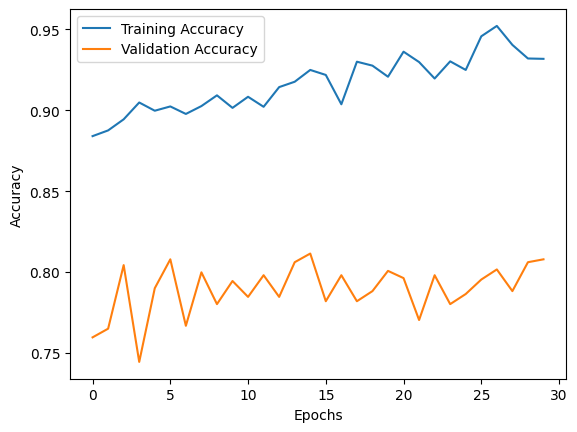

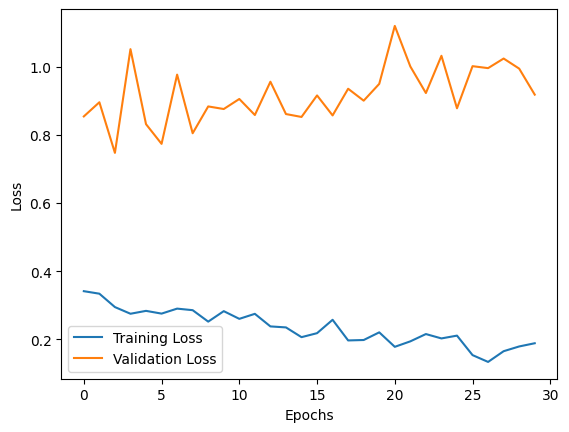

In [27]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# Get the training accuracy and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the training loss and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Print the training accuracy and validation accuracy
print("Training Accuracy:", train_acc[-1])
print("Validation Accuracy:", val_acc[-1])

# Print the training loss and validation loss
print("Training Loss:", train_loss[-1])
print("Validation Loss:", val_loss[-1])

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved VGG-16 model
saved_model_path = 'vgg16_trained_model.h5'
model = load_model(saved_model_path)

# Load and preprocess the image
image_path = '/content/drive/MyDrive/finaldataset/bha/137.jpg'
img = image.load_img(image_path, target_size=(64, 64))  # Use the same target size as during training
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# Make the prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted Class:", predicted_class)


1/1 [==============================] - 1s 614ms/step
Predicted Class: 5


In [29]:
from keras.utils.vis_utils import plot_model


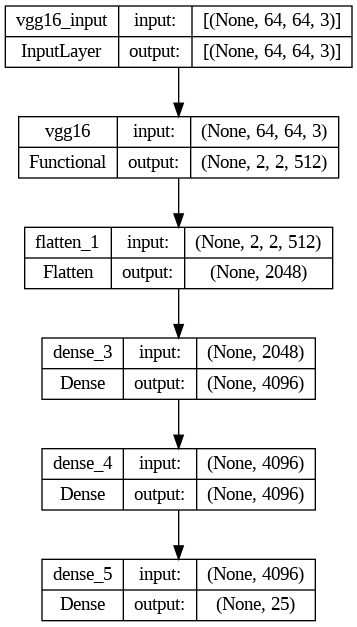

In [30]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [31]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the labels for the validation data
validation_images, validation_labels = validation_generator.next()
y_pred = model.predict(validation_images)
y_pred = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels to class indices
y_true = np.argmax(validation_labels, axis=1)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred)
print(report)


1/1 [==============================] - 0s 110ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       0.67      1.00      0.80         4
          18       0.67      1.00      0.80         2
          19       0.50      0.50      0.50         2
          20       0.50      0.50      0.50         2
          21       1.00      0.33      0.50         3
          22       1.00      1.00      1.00         2
          24       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the labels for the training data
train_images, train_labels = train_generator.next()
y_pred_train = model.predict(train_images)
y_pred_train = np.argmax(y_pred_train, axis=1)

# Convert one-hot encoded labels to class indices
y_true_train = np.argmax(train_labels, axis=1)

# Calculate precision, recall, and F1-score for training set
report_train = classification_report(y_true_train, y_pred_train)
print(report_train)


1/1 [==============================] - 0s 56ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         2
          19       0.67      1.00      0.80         2
          20       1.00      1.00      1.00         3
          21       1.00      0.75      0.86         4
          22       1.00      1.00      1.00         1
          24       1.00      

In [33]:
import numpy as np
from sklearn.metrics import classification_report

# Predict the labels for the testing data
test_images, test_labels = validation_generator.next()
y_pred_test = model.predict(test_images)
y_pred_test = np.argmax(y_pred_test, axis=1)

# Convert one-hot encoded labels to class indices
y_true_test = np.argmax(test_labels, axis=1)

# Calculate precision, recall, and F1-score for testing set
report_test = classification_report(y_true_test, y_pred_test)
print(report_test)


1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       0.33      1.00      0.50         1
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         1
          15       0.50      0.33      0.40         3
          16       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         2
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         2
          21       0.67      0.80      0.73         5
          22       1.00      1.00      1.00         5
          23       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         2

    accuracy                           0.81        32
   macro avg       0.70     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

***CROSS VALIDATION ON VGG16***

In [37]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Set the directory containing the images
data_directory = "/content/drive/MyDrive/finaldataset"

# Set the number of classes and other hyperparameters
num_classes = 25
image_size = (64, 64)
batch_size = 32
epochs = 35
num_folds = 5

# Initialize the ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the data and labels
data = []
labels = []

label_encoder = LabelEncoder()

for class_folder in os.listdir(data_directory):
    class_path = os.path.join(data_directory, class_folder)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
            image_array = tf.keras.preprocessing.image.img_to_array(image)
            data.append(image_array)
            labels.append(class_folder)

# Convert the data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode the labels
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)  # Convert labels to one-hot encoded format

# Perform cross-validation
skf = StratifiedKFold(n_splits=num_folds, shuffle=True)

fold = 1
for train_index, val_index in skf.split(data, np.argmax(labels, axis=1)):  # Use the index of the max value as label
    print(f"Fold: {fold}")
    fold += 1

    # Split the data into training and validation sets
    x_train, x_val = data[train_index], data[val_index]
    y_train, y_val = labels[train_index], labels[val_index]

    # Load the VGG-16 model pre-trained on ImageNet
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

    # Freeze the pre-trained layers
    for layer in vgg16.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(vgg16)
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Initialize the ImageDataGenerator for training and validation
    train_generator = data_generator.flow(x_train, y_train, batch_size=batch_size)
    val_generator = data_generator.flow(x_val, y_val, batch_size=batch_size)

    # Train the model
    model.fit(train_generator, epochs=epochs, validation_data=val_generator)

    # Evaluate the model on the validation set
    scores = model.evaluate(val_generator)
    print("Validation Loss:", scores[0])
    print("Validation Accuracy:", scores[1])


Fold: 1
Epoch 1/35
141/141 [==============================] - 7s 34ms/step - loss: 1.8921 - accuracy: 0.4543 - val_loss: 1.2533 - val_accuracy: 0.5975
Epoch 2/35
141/141 [==============================] - 4s 26ms/step - loss: 1.0886 - accuracy: 0.6514 - val_loss: 0.9709 - val_accuracy: 0.6941
Epoch 3/35
141/141 [==============================] - 3s 24ms/step - loss: 0.9198 - accuracy: 0.6989 - val_loss: 0.9382 - val_accuracy: 0.7110
Epoch 4/35
141/141 [==============================] - 3s 24ms/step - loss: 0.8635 - accuracy: 0.7067 - val_loss: 0.8431 - val_accuracy: 0.7411
Epoch 5/35
141/141 [==============================] - 4s 25ms/step - loss: 0.7618 - accuracy: 0.7446 - val_loss: 0.8774 - val_accuracy: 0.7207
Epoch 6/35
141/141 [==============================] - 4s 25ms/step - loss: 0.7201 - accuracy: 0.7707 - val_loss: 0.9538 - val_accuracy: 0.6986
Epoch 7/35
141/141 [==============================] - 3s 24ms/step - loss: 0.7058 - accuracy: 0.7663 - val_loss: 0.8122 - val_accuracy

In [41]:
model.save(f'vgg16_trained_model_fold{fold+1}.h5')

In [42]:
# Save the trained model
model.save(f'vgg16_trained_model_fold{fold}.h5')


Fold: 1
Fold: 2
Fold: 3
Fold: 4
Fold: 5


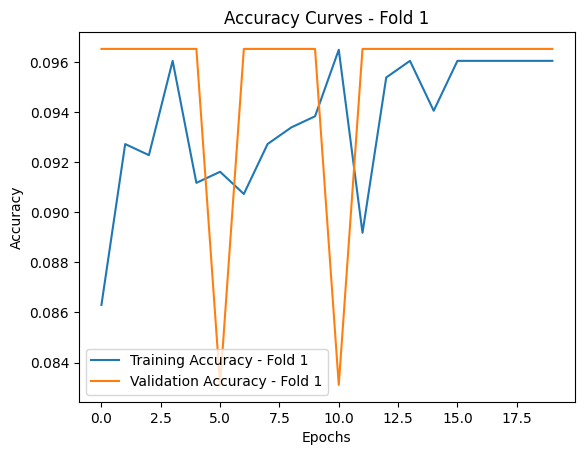

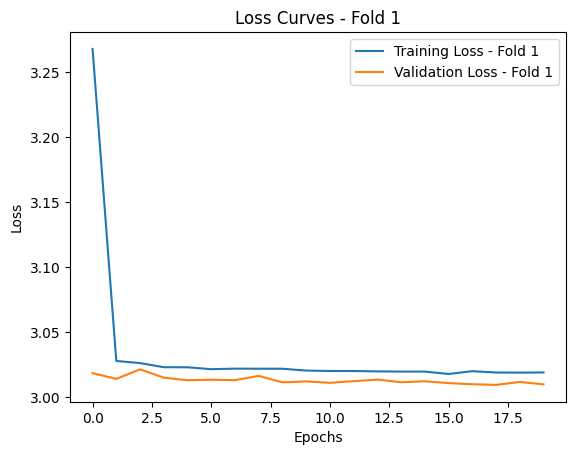

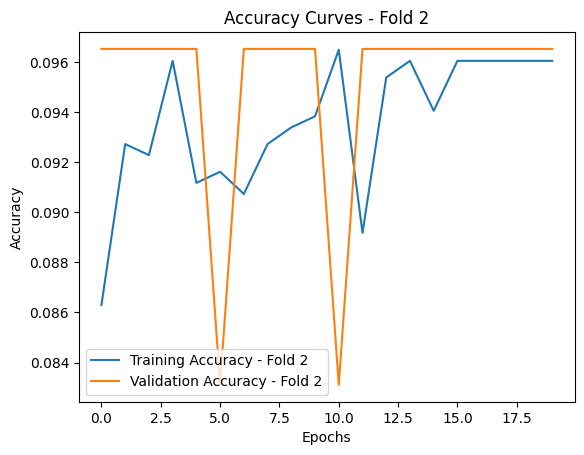

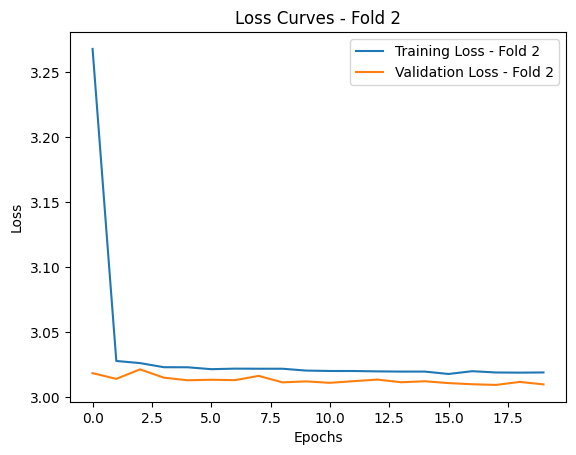

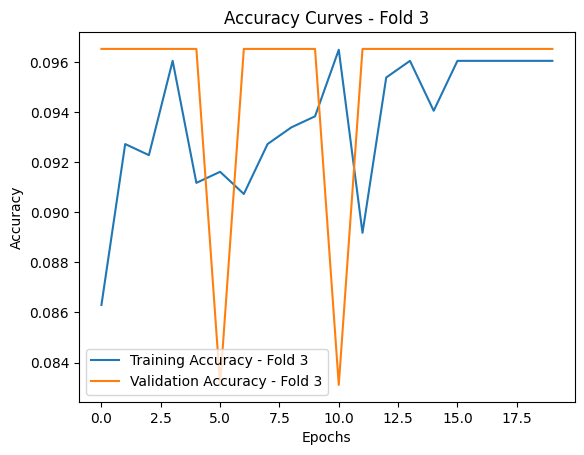

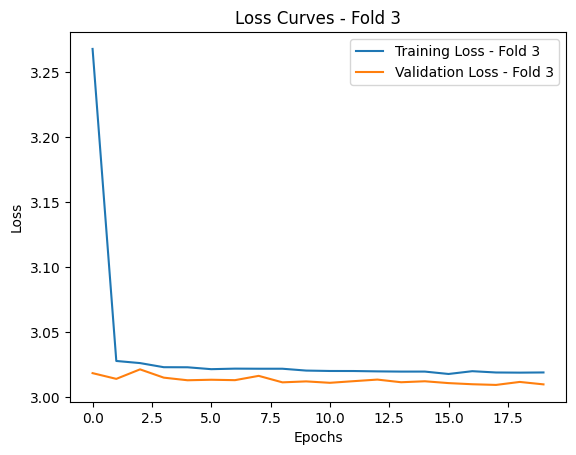

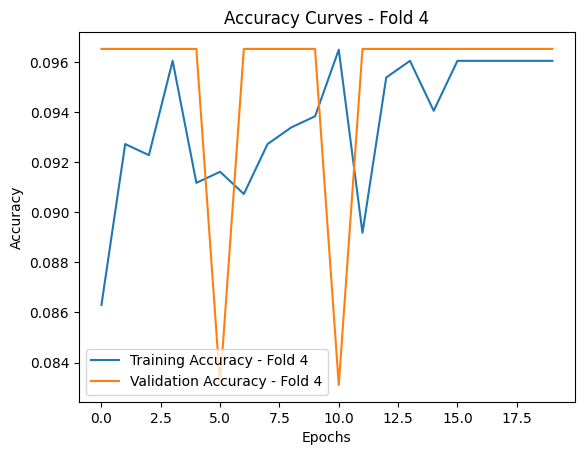

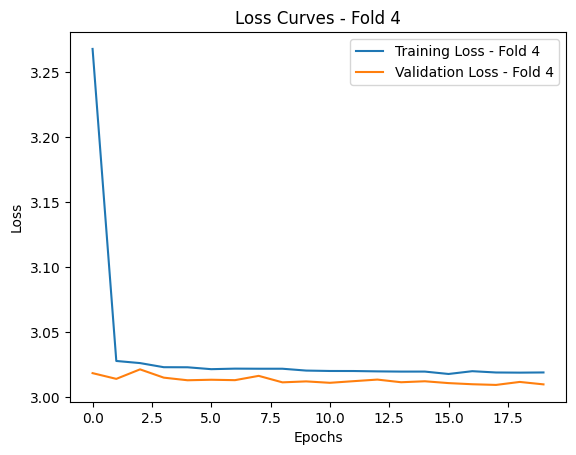

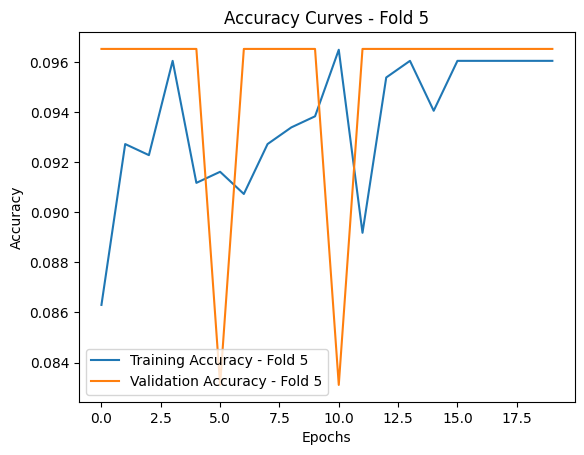

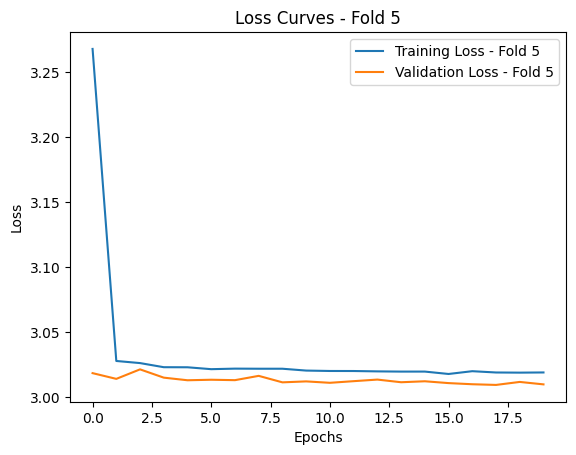

In [46]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy and loss values for each fold
fold_train_acc = []
fold_val_acc = []
fold_train_loss = []
fold_val_loss = []

fold = 1
for train_index, val_index in skf.split(data, np.argmax(labels, axis=1)):
    print(f"Fold: {fold}")


    # Store the training and validation accuracy and loss values for this fold
    fold_train_acc.append(history.history['accuracy'])
    fold_val_acc.append(history.history['val_accuracy'])
    fold_train_loss.append(history.history['loss'])
    fold_val_loss.append(history.history['val_loss'])

    fold += 1

# Plot the metrics for each fold
for fold in range(num_folds):
    # Plot the accuracy curves
    plt.plot(fold_train_acc[fold], label=f'Training Accuracy - Fold {fold+1}')
    plt.plot(fold_val_acc[fold], label=f'Validation Accuracy - Fold {fold+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy Curves - Fold {fold+1}')
    plt.show()

    # Plot the loss curves
    plt.plot(fold_train_loss[fold], label=f'Training Loss - Fold {fold+1}')
    plt.plot(fold_val_loss[fold], label=f'Validation Loss - Fold {fold+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss Curves - Fold {fold+1}')
    plt.show()


In [47]:
from sklearn.metrics import classification_report

fold = 1
for train_index, val_index in skf.split(data, np.argmax(labels, axis=1)):
    print(f"Fold: {fold}")



    # Generate predictions on the validation set
    y_pred = model.predict(val_generator)
    y_pred = np.argmax(y_pred, axis=1)

    # Convert one-hot encoded labels to class labels
    y_true = np.argmax(y_val, axis=1)

    # Calculate precision, recall, and F1 score
    report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    print(report)

    fold += 1


Fold: 1
35/35 [==============================] - 2s 55ms/step


ValueError: ignored

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the VGG-16 model pre-trained on ImageNet
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# ...

# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)

# ...

# Generate predictions on the training set
train_predictions = model.predict(train_generator)
train_predictions = np.argmax(train_predictions, axis=1)

# Convert one-hot encoded training labels to class labels
train_true_labels = np.argmax(train_generator.labels, axis=1)

# Calculate precision, recall, and F1 score for training set
train_precision = precision_score(train_true_labels, train_predictions, average='weighted')
train_recall = recall_score(train_true_labels, train_predictions, average='weighted')
train_f1 = f1_score(train_true_labels, train_predictions, average='weighted')

print("Training Precision:", train_precision)
print("Training Recall:", train_recall)
print("Training F1 Score:", train_f1)

# Generate predictions on the testing set
test_predictions = model.predict(test_generator)
test_predictions = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded testing labels to class labels
test_true_labels = np.argmax(test_generator.labels, axis=1)

# Calculate precision, recall, and F1 score for testing set
test_precision = precision_score(test_true_labels, test_predictions, average='weighted')
test_recall = recall_score(test_true_labels, test_predictions, average='weighted')
test_f1 = f1_score(test_true_labels, test_predictions, average='weighted')

print("Testing Precision:", test_precision)
print("Testing Recall:", test_recall)
print("Testing F1 Score:", test_f1)


NameError: ignored